In [1]:
import os
import xarray as xr
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import xarray as xr
import os
from tqdm import tqdm

# Function to split and save datasets along the 'time' dimension from the closest time_start
def split_and_save(path_dataset, output_dir, num_splits=10, time_start=None):
    # Load the dataset from the given path
    dataset = xr.open_dataset(path_dataset)
    
    # Get the 'time' dimension
    time = dataset.coords['time']
    
    # If a specific time_start is provided, find the closest time in the dataset
    if time_start is not None:
        # Find the index of the closest time
        start_idx = abs(time - time_start).argmin().item()  # Get the index of the closest time
        closest_time = time[start_idx].values
        print(f"Closest time to {time_start} is {closest_time}")
    else:
        # Default to the first time step if no time_start is provided
        start_idx = 0

    # Calculate the split size (remaining data from the start_idx onwards)
    split_size = (len(time) - start_idx) // num_splits
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Split the dataset along the 'time' dimension starting from the closest time_start
    for i in tqdm(range(num_splits)):
        end_idx = start_idx + split_size if i < num_splits - 1 else len(time)
        
        # Slice the dataset along the 'time' dimension
        time_slice = dataset.sel(time=slice(time[start_idx], time[end_idx - 1]))  # Adjust end time to avoid overflow
        
        # Save the split dataset to a new NetCDF file
        split_filename = os.path.join(output_dir, f"split_{i + 1}.nc")
        time_slice.to_netcdf(split_filename)
        print(f"Saved: {split_filename}")
        
        # Update start_idx for the next split
        start_idx = end_idx


In [3]:
def interpolate_dataset_on_new_time_grid(ds, new_time_array, output_file):
    """
    Interpolate all variables in the input dataset over a new time array.
    
    Parameters:
    ds (xr.Dataset): Input dataset containing a 'time' coordinate.
    new_time_array (array-like): The new time points for interpolation.
    output_file (str): Path to save the interpolated dataset as a .nc file.
    
    Returns:
    xr.Dataset: Interpolated dataset.
    """
    
    # Create a new xarray DataArray for the new time coordinate
    new_time = xr.DataArray(new_time_array, dims='time', name='time')
    
    # Interpolate all variables over the new time coordinate
    ds_interpolated = ds.interp(time=new_time)
    
    # Save the interpolated dataset to a .nc file
    ds_interpolated.to_netcdf(output_file)
    
    return ds_interpolated

In [14]:
ds_1 = xr.open_dataset('/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc')
ds_2 = xr.open_dataset('/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/2D/dataset_2d.nc')
# Define your new time array for interpolation (replace with your desired times)
new_time_array = new_time_array = ds_2.time.values  # Example new time array

# Interpolate the dataset and save it to a .nc file
output_file = '/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/1D/dataset_1d.nc'
interpolated_ds = interpolate_dataset_on_new_time_grid(ds_1, new_time_array, output_file)

# Print the interpolated dataset
print(interpolated_ds)


<xarray.Dataset> Size: 306MB
Dimensions:     (z: 64, time: 4801)
Coordinates:
  * z           (z) float32 256B 25.0 75.0 127.8 ... 2.589e+04 2.698e+04
  * time        (time) float32 19kB 30.25 30.26 30.27 ... 80.23 80.24 80.25
Data variables: (12/330)
    p           (z) float32 256B 1.004e+03 998.3 992.3 ... 23.23 19.96 16.88
    SST         (time) float32 19kB 300.0 300.0 300.0 300.0 ... 300.0 nan nan
    Ps          (time) float32 19kB 1.007e+03 1.007e+03 1.007e+03 ... nan nan
    CLDSHD      (time) float32 19kB 0.1654 0.1589 0.153 ... 0.2281 nan nan
    AREAPREC    (time) float32 19kB 0.05019 0.04875 0.05145 ... 0.06937 nan nan
    CLD245      (time) float32 19kB 0.0923 0.08545 0.08178 ... 0.1572 nan nan
    ...          ...
    QG          (time, z) float32 1MB 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    QCCLD       (time, z) float32 1MB -9.999e+03 -9.999e+03 ... nan nan
    QICLD       (time, z) float32 1MB -9.999e+03 -9.999e+03 ... nan nan
    QRCLD       (time, z) float32 1MB -

In [15]:
ds_1d = xr.open_dataset('/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/1D/dataset_1d.nc')

In [17]:
ds_1d.dims, ds_2.dims

(FrozenMappingWarningOnValuesAccess({'z': 64, 'time': 4801}),
 FrozenMappingWarningOnValuesAccess({'x': 128, 'y': 128, 'time': 4801}))

In [20]:
path_dataset = '/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/1D/dataset_1d.nc'
output_dir = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D'

# Call the function to split and save the dataset
split_and_save(path_dataset, output_dir, num_splits=10)

 10%|█         | 1/10 [00:00<00:05,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_1.nc


 20%|██        | 2/10 [00:01<00:05,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_2.nc


 30%|███       | 3/10 [00:01<00:04,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_3.nc


 40%|████      | 4/10 [00:02<00:03,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_4.nc


 50%|█████     | 5/10 [00:03<00:03,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_5.nc


 60%|██████    | 6/10 [00:03<00:02,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_6.nc


 70%|███████   | 7/10 [00:04<00:01,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_7.nc


 80%|████████  | 8/10 [00:05<00:01,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_8.nc


 90%|█████████ | 9/10 [00:05<00:00,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_9.nc


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_10.nc


In [22]:
path_dataset = '/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/2D/dataset_2d.nc'
output_dir = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D'

# Call the function to split and save the dataset
split_and_save(path_dataset, output_dir, num_splits=10)

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:07<01:11,  7.90s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_1.nc


 20%|██        | 2/10 [00:15<01:03,  7.95s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_2.nc


 30%|███       | 3/10 [00:23<00:53,  7.70s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_3.nc


 40%|████      | 4/10 [00:30<00:45,  7.58s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_4.nc


 50%|█████     | 5/10 [00:38<00:38,  7.72s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_5.nc


 60%|██████    | 6/10 [00:51<00:38,  9.50s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_6.nc


 70%|███████   | 7/10 [01:04<00:31, 10.62s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_7.nc


 80%|████████  | 8/10 [01:18<00:23, 11.63s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_8.nc


 90%|█████████ | 9/10 [01:32<00:12, 12.46s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_9.nc


100%|██████████| 10/10 [01:46<00:00, 10.62s/it]

Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_10.nc


In [6]:
path_dataset = '/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/3D/dataset_3d.nc'
output_dir = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D'

# Call the function to split and save the dataset
split_and_save(path_dataset, output_dir, num_splits=10)

  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
dataset = xr.open_dataset('/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/3D/dataset_3d.nc')
output_dir = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D'


time = dataset.coords['time']

start_idx = 0
num_splits=10
# Calculate the split size (remaining data from the start_idx onwards)
split_size = (len(time) - start_idx) // num_splits

In [5]:
split_size

480

In [9]:
dataset = xr.open_dataset('/home/ec2-user/DeepCloudLab/outputs/new_long_run_RCE_T300_U0_B1_M1/3D/dataset_3d.nc')
output_dir = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D'

time = dataset.coords['time']

start_idx = 0
num_splits=10
# Calculate the split size (remaining data from the start_idx onwards)
split_size = (len(time) - start_idx) // num_splits

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

end_idx = len(time)
    
# Slice the dataset along the 'time' dimension
start_idx = int(9*split_size)
time_slice = dataset.sel(time=slice(time[start_idx], time[end_idx-1]))  # Adjust end time to avoid overflow
print(time[start_idx], time[end_idx-1])

# Save the split dataset to a new NetCDF file
split_filename = os.path.join(output_dir, f"split_{10}.nc")
time_slice.to_netcdf(split_filename)
print(f"Saved: {split_filename}")

# Update start_idx for the next split
start_idx = end_idx


<xarray.DataArray 'time' ()> Size: 4B
array(75.25, dtype=float32)
Coordinates:
    time     float32 4B 75.25
Attributes:
    units:      d
    long_name:  time <xarray.DataArray 'time' ()> Size: 4B
array(80.25, dtype=float32)
Coordinates:
    time     float32 4B 80.25
Attributes:
    units:      d
    long_name:  time


Saved: /home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D/split_10.nc


In [15]:
for i in range(1,11):
    path_1d = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/1D/split_2.nc'
    path_2d = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/2D/split_2.nc'
    path_3d = '/home/ec2-user/DeepCloudLab/outputs/RCE_splits_v2/3D/split_2.nc'


    ds_1d = xr.open_dataset(path_1d)
    ds_2d = xr.open_dataset(path_2d)
    ds_3d = xr.open_dataset(path_3d)
    print(len(ds_1d.time), len(ds_2d.time), len(ds_3d.time))

480 480 480
480 480 480
480 480 480
480 480 480
480 480 480
480 480 480
480 480 480
480 480 480
480 480 480
480 480 480


In [14]:
print(len(ds_1d.time), ds_2d.dims, ds_3d.dims)

480 FrozenMappingWarningOnValuesAccess({'x': 128, 'y': 128, 'time': 480}) FrozenMappingWarningOnValuesAccess({'x': 128, 'y': 128, 'z': 64, 'time': 480})


In [63]:
ds_1d = xr.open_dataset('/home/ec2-user/DeepCloudLab/outputs/long_run_RCE_T300_U0_B1_M1/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc')

In [66]:
ds_3d

<xarray.Dataset> Size: 9GB
Dimensions:  (x: 128, y: 128, time: 4801)
Coordinates:
  * x        (x) float32 512B 0.0 1e+03 2e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * y        (y) float32 512B 0.0 1e+03 2e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * time     (time) float32 19kB 30.25 30.26 30.27 30.28 ... 80.23 80.24 80.25
Data variables: (12/29)
    Prec     (time, y, x) float32 315MB ...
    SHF      (time, y, x) float32 315MB ...
    LHF      (time, y, x) float32 315MB ...
    LWNS     (time, y, x) float32 315MB ...
    LWNSC    (time, y, x) float32 315MB ...
    LWNT     (time, y, x) float32 315MB ...
    ...       ...
    U850     (time, y, x) float32 315MB ...
    V850     (time, y, x) float32 315MB ...
    ZC       (time, y, x) float32 315MB ...
    TB       (time, y, x) float32 315MB ...
    ZE       (time, y, x) float32 315MB ...
    CLDC     (time, y, x) float32 315MB ...
Attributes:
    history:  Thu Dec  5 10:21:30 2024: ncrcat RCE_T300_U0_SAM1MOM_B1_128x128...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [17]:
ds = xr.open_dataset('/home/ec2-user/DeepCloudLab/processed_classes/long_run_RCE_T300_U0_B1_M1_v3/RCE_T300_U0_B1_M1/dataset_isentropic')

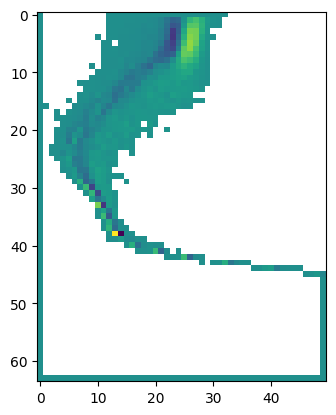

In [20]:
plt.imshow(ds.RHO_W[10].values)